In [3]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd
import seaborn as sns

In [4]:
def setConstants():
    # Set constants
    global REPOSITORY
    global FILE_FITNESSES
    global FILE_POSITIONS
    global FILE_DESCRIPTORS
    global REPLICATES
    global POPULATION
    global GENERATIONS
    global EVALUATIONS
    global ARENA
    global ARENA_HARDRACE
    global ARENA_TWOPATHS
    global ARENA_TWOROOMS
    global ARENA_STEPS
    
    ARENA_STEPS = 1
    ARENA_HARDRACE = 2
    ARENA_TWOROOMS = 3
    ARENA_TWOPATHS = 4
    
    REPOSITORY = '/home/ebb505/ARE_Project/are-logs/multipleRandomControllers/tenRandomControllers/temp_02_24/'
    FILE_FITNESSES = 'fitnesses.csv'
    FILE_POSITIONS = 'final_positions.csv'
    FILE_DESCRIPTORS = 'MD_Cart_WDH.csv'
    REPLICATES = 10
    POPULATION = 200
    GENERATIONS = 25
    EVALUATIONS = POPULATION * GENERATIONS
    ARENA = ARENA_STEPS
    
    print("Replicates: ", REPLICATES, " Generations: ", GENERATIONS, " Population: ", POPULATION, " Evaluations: ", EVALUATIONS)

In [5]:
def getDirectories():
    print("Getting directories...")
    # Get all directories
    FOLDERS = []
    FOLDERS_NAMES = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(REPOSITORY):
        for folder in d:
            temp_folder = folder.split("_")
            FOLDERS_NAMES.append(temp_folder[1])
            FOLDERS.append(os.path.join(r, folder))
            #print(folder)
    #print("Folders: ", len(FOLDERS))
    return FOLDERS, FOLDERS_NAMES

def getDataFromFiles(folders, filename, startingColumn):
    print("Getting data from files...")
    dataFiles = []
    for f in folders:
        temp_filepath = f + '/' + filename
        temp_list = []
        if os.path.isfile(temp_filepath):
            #print ("File exist: " + temp_filepath)
            with open(temp_filepath, 'r') as csvfile:
                data = csv.reader(csvfile, delimiter=',', quotechar='"')
                for row in data:
                    temp_list.append(row[startingColumn:-1]) # Last character is empty for some reason
            dataFiles.append(temp_list)
        else:
            print ("File not exist: " + temp_filepath)
            dataFiles.append(temp_list)
    return dataFiles

def transformDataToArray(data):
    print("Transform data to array...")
    # Transform to array
    replicates_data = []
    replicates_positions = []
    replicates_descriptors = []
    for rep in range(REPLICATES):
        tempDat = []
        tempDat = np.array([[float(y) for y in x] for x in data[rep]]) # Convert to array
        replicates_data.append(tempDat)
    return replicates_data

In [6]:
def extractFitness(arrayFitness):
    print("Extracting fitness...")
    fitnessEvaluations = []
    fitnessAverage = []
    for rep in range(REPLICATES):
        temp_list = []
        temp_ave = []
        for i in range(GENERATIONS):
            temp_ind = []
            for j in range(POPULATION):
                temp_ind.append(arrayFitness[rep][i][j])
                temp_list.append(arrayFitness[rep][i][j])
            temp_ave.append(np.mean(temp_ind))  

        fitnessAverage.append(temp_ave)    
        fitnessEvaluations.append(temp_list)
    return fitnessEvaluations, fitnessAverage

In [7]:
def plotFitnessEvaluations(folders, fitnessEvaluations):
    print("Plotting fitness evaluations...")
    for rep in range(REPLICATES):
        # Plot stuff
        font = {'weight' : 'normal',
                'size'   : 14.0}
        plt.rc('font', **font)
        plt.figure(0)
        #
        plt.plot(fitnessEvaluations[rep])
        plt.ylim([0.0,1.0])
        plt.xlabel('Evaluations')
        plt.ylabel('Fitness')
        plt.savefig(folders[rep] + '/Fitness.png',dpi=200)
        plt.close(0)

In [8]:
def plotFitnessAverage(folders, fitnessAverage):
    print("Plotting fitness average...")
    for rep in range(REPLICATES):
        # Plot stuff
        font = {'weight' : 'normal',
                'size'   : 14.0}
        plt.rc('font', **font)
        plt.figure(0)
        #
        plt.plot(fitnessAverage[rep])
        plt.ylim([0.0,1.0])
        plt.xlabel('Evaluations')
        plt.ylabel('Fitness')
        plt.savefig(folders[rep] + '/Average.png',dpi=200)
        plt.close(0)

In [9]:
def plotFitnessCoverage(fitnessData, filename):
    print("Plotting fitness coverage...")
    fitnesses_array = np.array([[float(y) for y in x] for x in fitnessData]) # Convert to array
    df = pd.DataFrame(fitnesses_array).melt()
    font = {'weight' : 'normal',
            'size'   : 14.0}
    plt.rc('font', **font)
    plt.figure(0)
    sns.lineplot(data=df, x="variable", y="value")
    plt.ylim([0.0,1.0])
    plt.xlabel('Evaluations')
    plt.ylabel('Fitness')
    plt.savefig(REPOSITORY+filename,dpi=200)
    plt.close(0)

In [10]:
def plotSwarmPlot(folders, arrayDescriptors, fitnessEvaluations):
    print("Plotting swarm plots...")
    for rep in range(REPLICATES):
        # Plot stuff
        font = {'weight' : 'normal',
                'size'   : 14.0}
        plt.rc('font', **font)
        plt.figure(0)
        
        sns.swarmplot(x=arrayDescriptors[rep][:EVALUATIONS,5],y=fitnessEvaluations[rep])
        plt.xlabel('Number of wheels')
        plt.ylabel('Fitness')
        plt.ylim([0.0,1.0])
        TICKPOS =  range(8+1)
        TICKLABEL = range(8+1)
        plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
        
        plt.savefig(folders[rep] + '/SwarmPlot.png',dpi=200)
        plt.close(0)

In [11]:
def plotScatter(folders, arrayPositions, arena):
    print("Plotting scatter plots...")
    for rep in range(REPLICATES):
        font = {'weight' : 'normal',
                'size'   : 14.0}
        plt.rc('font', **font)
        plt.figure(0)
        plt.scatter(arrayPositions[rep][:,1], arrayPositions[rep][:,2])
        plt.xlim([-1.0,1.0])
        plt.ylim([-1.0,1.0])
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        
        if(arena== ARENA_STEPS):
            print("")
        elif(arena== ARENA_HARDRACE):
            plt.plot([0.0, 0.5], [-0.5, 0.0], 'k--')
            plt.plot([0.0, 0.5], [0.5, 1.0], 'k--')
            plt.plot([-0.5, 0.0], [1.0, 0.5], 'k--')
            plt.plot([-0.5, 0.0], [0.5, 0.0], 'k--')
            plt.plot([0.0, -0.5], [0.0, -0.5], 'k--')
            plt.plot([-0.5, 0.0], [-0.5, -1.0], 'k--')
            
            plt.plot([-0.5, -0.5], [-1.0, 0.5], 'k--')
            plt.plot([0.5, 0.5], [-0.5, 1.0], 'k--')
            
            plt.plot([0.0, 0.5], [-0.5, -0.5], 'k--')
            
            circle1 = plt.Circle((-0.75, -0.75), 0.1, color='b')
            circle2 = plt.Circle((0.75, 0.75), 0.1, fill=0)
            ax = plt.gca()
            ax.add_patch(circle1)
            ax.add_patch(circle2)
        elif(arena == ARENA_TWOROOMS):
            plt.plot([-0.5, 0.5], [0.6, 0.6], 'k--')
            plt.plot([-1.0, 0.0], [0.3, 0.3], 'k--')
            plt.plot([0.5, 1.0], [0.3, 0.3], 'k--')
            plt.plot([-0.75, -0.25], [-0.25, -0.25], 'k--')
            plt.plot([-0.75, -0.25], [-0.75, -0.75], 'k--')
            
            plt.plot([-0.25, -0.25], [-0.75, -0.25], 'k--')
            
            circle1 = plt.Circle((0.0, 0.75), 0.1, color='b')
            circle2 = plt.Circle((-0.5, -0.5), 0.1, fill=0)
            ax = plt.gca()
            ax.add_patch(circle1)
            ax.add_patch(circle2)
        elif(arena == ARENA_TWOPATHS):
            plt.plot([-0.3, 0.3], [0.0, 0.0], 'k--')
            plt.plot([-0.3, -0.3], [-0.5, 0.5], 'k--')
            plt.plot([0.3, 0.3], [-0.5, 0.5], 'k--')
            
            circle1 = plt.Circle((0.0, -0.75), 0.1, color='b')
            circle2 = plt.Circle((0.0, 0.25), 0.1, fill=0)
            ax = plt.gca()
            ax.add_patch(circle1)
            ax.add_patch(circle2)
        else:
            print("Arena doesn't exist")
        
        plt.savefig(folders[rep] + '/Scatter.png',dpi=200)
        plt.close(0)

Replicates:  10  Generations:  25  Population:  200  Evaluations:  5000
Getting directories...
Getting data from files...
Getting data from files...
Getting data from files...
Transform data to array...
Transform data to array...
Transform data to array...
Extracting fitness...
Plotting scatter plots...










Plotting fitness evaluations...
Plotting fitness average...
Plotting fitness coverage...
Plotting fitness coverage...
Plotting swarm plots...


KeyboardInterrupt: 

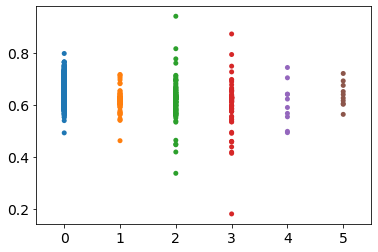

In [12]:
setConstants()
folders,folderNames = getDirectories()

dataPositions = getDataFromFiles(folders, FILE_POSITIONS, 0)
dataDescriptors = getDataFromFiles(folders, FILE_DESCRIPTORS, 0)
dataFitness = getDataFromFiles(folders, FILE_FITNESSES, 3)

arrayPositions = transformDataToArray(dataPositions)
arrayDescriptors = transformDataToArray(dataDescriptors)
arrayFitness = transformDataToArray(dataFitness)

fitnessEvaluations, fitnessAverage = extractFitness(arrayFitness)

plotScatter(folders, arrayPositions, ARENA)
plotFitnessEvaluations(folders, fitnessEvaluations)
plotFitnessAverage(folders, fitnessAverage)
plotFitnessCoverage(fitnessEvaluations, 'FitnessEvaluations.png')
plotFitnessCoverage(fitnessAverage, 'FitnessAverage.png')
plotSwarmPlot(folders, arrayDescriptors, fitnessEvaluations)